In [1]:
import requests
import time
import pandas as pd
pd.set_option('expand_frame_repr', False)


BASE_URL = 'https://fapi.binance.com'
time_range = 1000   ## minutes
end_time = int(time.time() // 60 * 60 * 1000)w
print(end_time)
start_time = int(end_time - time_range*60*1000)
print(start_time)

while True:

    url = BASE_URL + '/futures/data/openInterestHist' + '?symbol=ETHUSDT&period=15m' + '&startTime=' + str(
        start_time) + '&endTime=' + str(end_time)
    print(url)
    resp = requests.get(url)
    data = resp.json()

1635845460000
1635785460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&startTime=1635785460000&endTime=1635845460000
https://fapi.binance.com/futures/data/openInterestHist?symbol=ETHUSDT&period=15m&st

KeyboardInterrupt: 

In [3]:
df = pd.DataFrame(data)

In [5]:
def timeStamp(timeNum): 
    timeStamp = float(timeNum/1000) 
    timeArray = time.localtime(timeStamp) 
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime

In [6]:
df['timestamp'] = df['timestamp'].apply(lambda x : timeStamp(x))

In [11]:
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df.set_index('timestamp', inplace=True)


In [12]:
df[['sumOpenInterest','sumOpenInterestValue']] = df[['sumOpenInterest','sumOpenInterestValue']].astype('float32')

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")


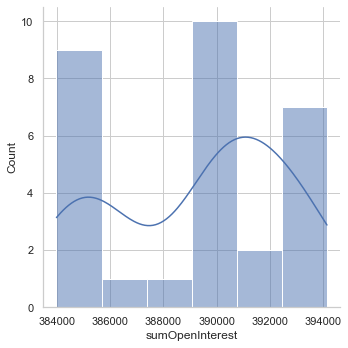

In [18]:
sns.displot(data=df, x='sumOpenInterest', kde=True)